<a href="https://colab.research.google.com/github/Terry-Migwi/Moringa_Datascience_Core_Week_6_IP/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2020_07_Terry_Migwi_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the question


### Specifying the question

As the football analyst of Mchezopesa limited, I have a task to predict the results of a football match between two teams i.e the home team or the away team.

The main objective of this study is to:
1. Fit a polynomial model that will predict the home team and the away team scores
3. Fit a logistic model to determine if the home team will win, draw or lose to the away team


### Defining the Metrics for success

The following are the factors that will determine the success of this study.

1. Determine the most appropriate variables to train our models 
2. Creating appropriate train and test variables for our models
3. Fitting and evaluating our models


### Understanding the context

Mchezopesa limited is a sports analytics company that helps fans analyze and predict individual athletes and team performance. Mchezopesa uses real-time daily and historial data to perform predictive modelling algorithms that they use to make projections that are used by fantasy sports fans. By far, football is the most popular fantasy sport contributing to 36% of the indusry revenue hence mchezopesa focusses on football. The main objective of mchezopesa is to make accurate projections that will optimize winning chances of fantasy sports players hence attracting new players and maintaing existing players.

Mchezopesa users focus on three factors i.e the home team, the away team and the type of tournament. i.e either the home team will win or the away team will win based on the type of match they have selected.As the football analyst of mchezopesa, I have a task to ensure the players make winning moves by making the most accurate predictions based on the data available.

### Recording the experimental design

The following are the steps to take during this study:
1.   Importing necessary dependencies and libraries
2.   Loading datasets and investigating important features of the data
3.   Merging the datasets
4.   Performing EDA 
5.   Feature Engineering
6.   Obtaining appropriate training and test sets 
7.   Fitting appropriate models to the sets
8.   Evaluating the models i.e cross-validation, multi-collinearity and hyperparameter tuning



### Data Relevance

The data provided for this study consists of two datasets i.e fifa rankings and results datasets in csv files. Both datasets contain details of football teams, scores, tournaments, countries, rankings, dates of scores, dates of ranking and units used to find the rankings. As both datasets are equally important for the analyis, we will be required to merge them into one so we can utilize them both. 

A major decision that needs to be made is what variable we will merge our datasets on. There are columns that are similar to both datasets i.e country and date columns. Major concerns are on how to integrate the two datasets to ensure we maximize on the data and as a result get optimal results. For us to achieve this, we need to ensure we obtain an appropriate size of the data, minimize on duplicate values, and that we obtain a dataset that is less bias. 

For the reasons stated above, the better option is to integrete the data on the date columns. It is however important to note that both datasets have different records of years. The results dataset has years recorded from 1872 to 2019 while the fifa ranking dataset has years recorded from 1993 to 2018. This means that we will end up with a dataset that has greatly reduced in size as the merge will only integrete the dates both datasets have in common. Hence the final dataset we will analyze will be from 1993 - 2018 and not all that has been provided.

##2. Reading the data

In [ ]:
#importing our dependencies

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_style()


### Loading Datasets

In [ ]:
ranking = pd.read_csv("/content/fifa_ranking.csv")

# previewing the top part of the data
ranking.head(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [ ]:
# previewing the bottom of the data

ranking.tail(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
ranking.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [ ]:
#exploring columns in the rankings dataset

ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
#finding the size of the ranking dataset

ranking.shape

(57793, 16)

We have a total of 57,793 records and 16 columns in the dataset

In [ ]:
#checking datatypes for the columns

ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

All the columns seem to be of appropriate datatypes except for the rank date which is an object but a more appropriate datatype is datetime

In [ ]:
#converting rank date to datetime data type

ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])

In [ ]:
# loading the results dataset

results = pd.read_csv("/content/results.csv", encoding = 'latin1')
results.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False


In [ ]:
# previewing the bottom part of the dataset

results.tail(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# checking into the columns in the dataset

results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
# checking the size of the dataset

results.shape

(40839, 9)

The dataset has 40,839 records and 9 columns 

In [ ]:
# checking unique values of the dataset

results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [ ]:
# exploring datatypes of the different columns 

results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

All columns have appropriate datasets except for the date column that is an object. We need to convert it to datetime datatype.

In [ ]:
#converting date column to datetime data type

results['date'] = pd.to_datetime(results['date'])


In [ ]:
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

### Merging the Datasets

In [ ]:
#rename country in the ranking dataset to avoid duplicats

ranking = ranking.rename(columns = {"country_full" : "country"})

In [ ]:
# merging the main dataset
football = results.merge(ranking, left_on = ['date', 'home_team'],
                          right_on = ['rank_date', 'country'])
football = results.merge(ranking, left_on = ['date', 'away_team'],
                          right_on = ['rank_date', 'country'], suffixes =('_home', '_away_'))
football.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country_home,neutral,rank,country_away_,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,MaceiÃ³,Brazil,False,14,Mexico,MEX,0.0,42,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,94,Venezuela,VEN,0.0,4,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,86,Sierra Leone,SLE,0.0,16,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08


In [ ]:
#merging the two datasets on home team to obtain a dataset of home team countries with their rankings

home_team = results.merge(ranking, left_on = ['date', 'home_team'],
                          right_on = ['rank_date', 'country'])
home_team.head(3)

#renaming the rank and rank change columns to home team rank columns 

home_team = home_team.rename(columns = ({'rank' : 'home_team_rank', 'rank_change' : 'home_rank_change'}))
home_team.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,home_team_rank,country_y,country_abrv,total_points,previous_points,home_rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,MaceiÃ³,Brazil,False,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08


In [ ]:
#merging the two datasets on away team to obtain a dataset of away team countries with their rankings

away_team = results.merge(ranking, left_on = ['date', 'away_team'],
                          right_on = ['rank_date', 'country'], suffixes =('_home', '_away_'))
away_team.tail(4)

#renaming rank to away team rank

away_team = away_team.rename(columns = {'rank' : 'away_team_rank', 'rank_change' : 'away_rank_change'})
away_team.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country_home,neutral,away_team_rank,country_away_,country_abrv,total_points,previous_points,away_rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,MaceiÃ³,Brazil,False,14,Mexico,MEX,0.0,42,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,94,Venezuela,VEN,0.0,4,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,86,Sierra Leone,SLE,0.0,16,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08


In [ ]:
# adding home team rank, home team rank change, away team rank and away team rank change to the football dataframe
football['home_team_rank'] = home_team['home_team_rank']
football['away_team_rank'] = away_team['away_team_rank']
football['home_team_rank_change'] = home_team['home_rank_change']
football['away_team_rank_change'] = away_team['away_rank_change']


football.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country_home,neutral,rank,country_away_,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,home_team_rank,away_team_rank,home_team_rank_change,away_team_rank_change
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,22,Uruguay,URU,0.0,47,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,59,22,28,-6
1,1993-08-08,Brazil,Mexico,1,1,Friendly,MaceiÃ³,Brazil,False,14,Mexico,MEX,0.0,42,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08,8,14,-5,11


##3. Checking the merged dataset

In [ ]:
# splitting the rank date column to year, month and date

football[['yy','mm','dd']] = football['rank_date'].astype(str).str.split('-', expand=True).astype(str)

#checking the datatypes to ensure changes have been made
football.dtypes

date                       datetime64[ns]
home_team                          object
away_team                          object
home_score                          int64
away_score                          int64
tournament                         object
city                               object
country_home                       object
neutral                              bool
rank                                int64
country_away_                      object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                     

The split year, months and date columns have been changed to string datatypes as we need the year column as a category variable for the study

In [ ]:
#checking our columns 

football.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country_home', 'neutral', 'rank',
       'country_away_', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date', 'home_team_rank', 'away_team_rank',
       'home_team_rank_change', 'away_team_rank_change', 'yy', 'mm', 'dd'],
      dtype='object')

Some columns have the same details, some have been repeated while others are irrelevant to our study hence the need to drop most columns 

In [ ]:
# dropping irrelevent columns from the football dataset

# football.drop(['date', 'city', 'country_home', 'rank', 'country_away_', 'country_abrv', 'rank_change', 'rank_date', 'mm', 'dd',
                'neutral', 'total_points', 'previous_points', 'cur_year_avg', 'cur_year_avg_weighted','last_year_avg', 'last_year_avg_weighted',
                'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted', 'confederation', 'home_team_rank_change',
                'away_team_rank_change'], axis = 1, inplace = True)

In [ ]:
# renaming yy to year 
football = football.rename(columns = {'yy' : 'year'})

In [ ]:
# confirming we only have relevent columns in our dataset

football.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'home_team_rank', 'away_team_rank', 'year'],
      dtype='object')

All the columns required for this study are present. However, we might need to add other columns

In [ ]:
#checking the size of our newly obtained dataset

football.shape


(933, 8)

The new dataset has 933 records and 8 columns. The records have greatly reduced as a result of the merging. Even so, the remaining dataset is sufficient for this study. 

In [ ]:
#obtaining more information about the dataset
football.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 0 to 932
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   home_team       933 non-null    object
 1   away_team       933 non-null    object
 2   home_score      933 non-null    int64 
 3   away_score      933 non-null    int64 
 4   tournament      933 non-null    object
 5   home_team_rank  933 non-null    int64 
 6   away_team_rank  933 non-null    int64 
 7   year            933 non-null    object
dtypes: int64(4), object(4)
memory usage: 65.6+ KB


The data has a total of 933 records of non-null values. The datatypes are all appropriate.

In [ ]:
# checking for duplicates in the dataset

football[football.duplicated()]

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,year


There are no records that have duplicates in our dataset

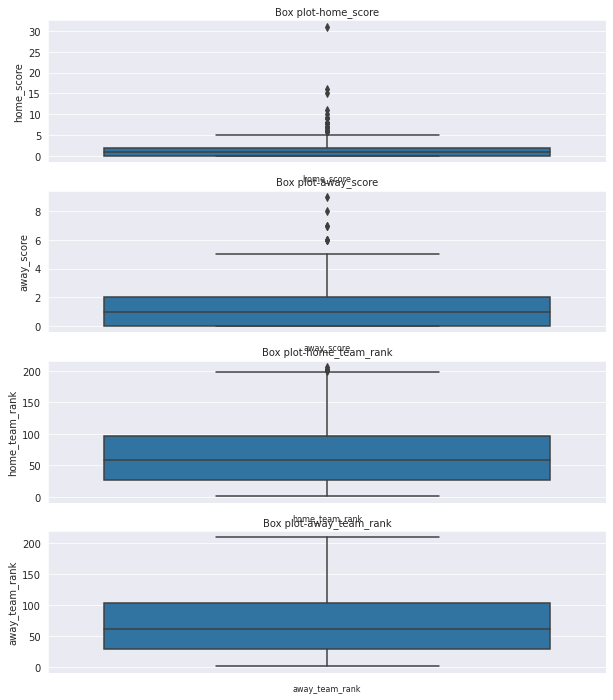

In [ ]:
# checking for outliers in the home scores, away scores and the ranking columns
# creating a list of columns of interest

columns = ['home_score', 'away_score', 'home_team_rank', 'away_team_rank']


fig, ax = plt.subplots(len(columns), figsize = (10, 12))

for i, col_val in enumerate(columns):

  sb.boxplot(y= football[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()



In the home score column, most of the observations lie above the 5 mark but below the 20 mark. There is also an observed value at the 31st mark. This could be a true observation hence we will not remove it. In the away score column, the points are distributed evenly above 5 but below 10, there is no value that is observed as an anomaly.

The home team rank column has an outlier around the 200 mark while there are no outliers in the away team rank column.


##4. External Datasource Validation

Websites such as wikipedia, fifa.com, rsssf.com and individual football associations' websites have all recorded the first match ever as the match between scotland and England in the year 1872 hence we should consider the dataset valid for this study.

##5. Exploratory Data Analysis

In [ ]:
! pip install pandas_profiling

In [ ]:
# from pandas_profiling import ProfileReport
# ProfileReport(football)

### Univariate Analysis

In [ ]:
football.describe()

,home_score,away_score,home_team_rank,away_team_rank
count,933.000000,933.000000,933.000000,933.000000
mean,1.648446,1.004287,66.025723,70.445874
std,1.951309,1.167323,47.557006,50.450593
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,27.000000,29.000000
50%,1.000000,1.000000,59.000000,61.000000
75%,2.000000,2.000000,96.000000,103.000000
max,31.000000,9.000000,206.000000,209.000000


###Measures of Central Tendency

In [ ]:
# creating a list of scores and ranks of the teams
columns = ['home_score', 'away_score', 'home_team_rank', 'away_team_rank']

#Obtaining the mean of the columns mentioned

for column in columns:
  print('\n')
  print(column +':' + str(football[column].mean()))



home_score:1.6484458735262595


away_score:1.0042872454448017


home_team_rank:66.02572347266882


away_team_rank:70.44587352625938


Both home scores and away scores have a mean range of 1 but home score has a higher mean by 0.5. 

The mean values of the away team rank is higher than the mean value of the home team rank. Hence the away teams have recorded higher chances of higher rankings.



In [ ]:
#Obtaining the mode of the columns mentioned

for column in columns:
  print('\n')
  print(column +':' + str(football[column].mode()))



home_score:0    1
dtype: int64


away_score:0    0
dtype: int64


home_team_rank:0    33
dtype: int64


away_team_rank:0    36
dtype: int64


Most home scores recorded are 1's as compared to most away scores recorded that are 0's. 

Most home teams are ranked at 33 while most away teams are ranked at 36, hence more away scores have a higher ranking as compared to the home teams

### Measures of Dispersion

In [ ]:
for column in columns:
  print('\n')
  print(column + ', variance: ' +str(football[column].var()))
  print(column + ', std_deviation: ' +str(football[column].std()))
  print(column + ', skewness: ' +str(football[column].skew()))
  print(column + ', kurtosis: ' +str(football[column].kurt()))



home_score, variance: 3.8076075606400894
home_score, std_deviation: 1.9513091914507268
home_score, skewness: 5.276778075359087
home_score, kurtosis: 60.985748604004904


away_score, variance: 1.3626425440109746
away_score, std_deviation: 1.1673228105417004
away_score, skewness: 1.8330710075212275
away_score, kurtosis: 5.839401828995081


home_team_rank, variance: 2261.668865489972
home_team_rank, std_deviation: 47.55700648158978
home_team_rank, skewness: 0.7211541914994738
home_team_rank, kurtosis: -0.21116227568788837


away_team_rank, variance: 2545.2623568809854
away_team_rank, std_deviation: 50.45059322625439
away_team_rank, skewness: 0.6728937288778412
away_team_rank, kurtosis: -0.35497011685628177


Variance and standard deviation of the home scores and away scores are quite low, this is an indication that the number of scores for  both teams do not vary so much from each other. 

However, as for the home and away team ranks, the variance and standard deviations are quite high. THis shows that both teams have huge variation in rank.

Scores from both teams seem to have a normal distribution, with the home team score distribution being right skewed and with fat tails hence shows that there are outliers in this column. As for the away team's scores,the distriution is slightly skewed to the right and has thin tails.

The ranks for both teams also seem to exhibit a normal distribution with very thin tails.

###Histograms

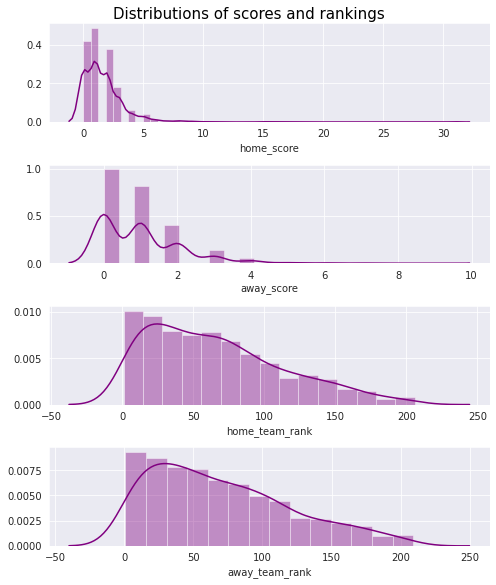

In [ ]:
# histograms of our columns of interest

sb.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (7, 8))
fig.suptitle('Distributions of scores and rankings', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), football, columns):
  sb.distplot(football[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

The histograms confirm that the distribution of the data is slighlty normal but seems to be skewed to the right. 

### Bar Charts

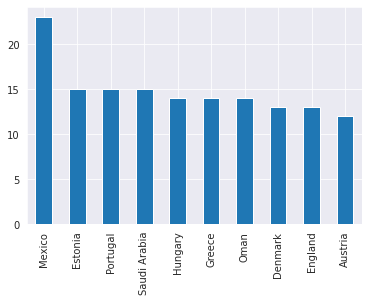

In [ ]:
# creating a list of all categorical columns for exploration

categorical_columns = ['home_team', 'away_team', 'tournament', 'year']

football['home_team'].value_counts().head(10).plot.bar()


In [ ]:
# frequency distribution

football['home_team'].value_counts()

Mexico                 23
Estonia                15
Portugal               15
Saudi Arabia           15
Hungary                14
                       ..
Belize                  1
Gambia                  1
Antigua and Barbuda     1
American Samoa          1
Philippines             1
Name: home_team, Length: 175, dtype: int64

Mexico has the most records of home teams i.e most of the matches were played in Mexico, followed by Portugal, Saudi Arabia and Estonia whereas Liberia, Papua New Guinea, Samoa, Afghanistan and Macau have the least records of home teams

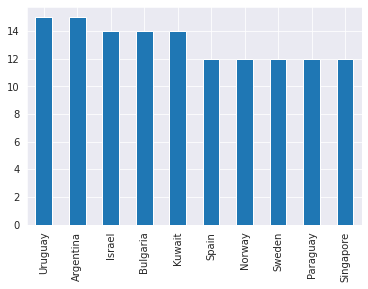

In [ ]:
# bar graph of away teams

football['away_team'].value_counts().head(10).plot.bar()


In [ ]:
# frequency distrbution of the away team

football['away_team'].value_counts()

Uruguay               15
Argentina             15
Israel                14
Bulgaria              14
Kuwait                14
                      ..
Dominican Republic     1
Grenada                1
Equatorial Guinea      1
Congo                  1
Sierra Leone           1
Name: away_team, Length: 164, dtype: int64

There are a total of 175 away teams with Uruguay and Argentina being the most records of 15 and Sierra Leone, Chad, Nepal, San Marino and Solomon Islands with the least records of 1.

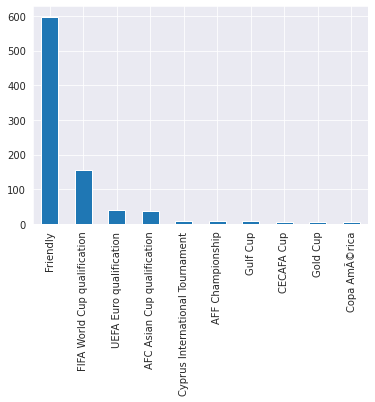

In [ ]:
# bar graphs of the types of tournaments played

football['tournament'].value_counts().head(10).plot.bar()

In [ ]:
# frequency distribution of tournaments

football['tournament'].value_counts()

Friendly                                      598
FIFA World Cup qualification                  155
UEFA Euro qualification                        39
AFC Asian Cup qualification                    36
Cyprus International Tournament                 8
AFF Championship                                8
Gulf Cup                                        7
CECAFA Cup                                      6
Gold Cup                                        6
Copa AmÃ©rica                                   6
CFU Caribbean Cup qualification                 5
African Cup of Nations qualification            5
AFC Asian Cup                                   4
African Nations Championship                    4
African Cup of Nations                          4
SAFF Cup                                        4
King's Cup                                      3
Gold Cup qualification                          3
United Arab Emirates Friendship Tournament      3
Malta International Tournament                  3


The total types of tournaments recorded is 38. The tournament with the highest record is of 589 friendly matches followed by 155 matches of FIFA World Cup qualifications. There's a huge difference between the two most recorded types of tournaments, this means our data consisits of mostly friendly matches. Most of the other tournament types have significantly few records.

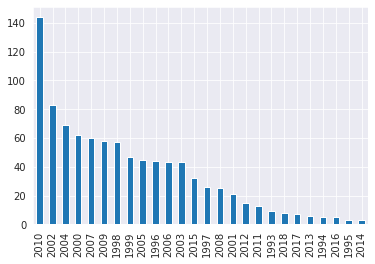

In [ ]:
# bar charts of years 
football['year'].value_counts().plot.bar()

The year 2010 had the most matches played, around 140 matches. This could have been as a result of the world cup that happened during that year followed by 2002 with 85 matches, which was also an year the world cup was played. Following closely is 2004 with around 70 matches. 2014 and 1995 have recorded the least matches played.

<!-- rank dates -->

##6. Implementing the Solution

This stage will involve the following steps:

1. Perform any necessary feature engineering 
2. Check of multicollinearity
3. Start building the model
4. Cross-validate the model
5. Compute RMSE
6. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
7. Perform appropriate regressions on the data including your justification


### Feature Engineering

In [ ]:
# creating a new dataframe that we will use 
football_data = football
football_data.head(2)

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,year
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,1993
1,Brazil,Mexico,1,1,Friendly,8,14,1993


In [ ]:
# adding the status column to the dataset 
# creating a list of our conditions
conditions = [
              football_data['home_score'] > football_data['away_score'],
              football_data['home_score'] == football_data['away_score'],
              football_data['home_score'] < football_data['away_score']
]

# create a list of the values we want to assign for each 
values = ['Win', 'Draw', 'Loss']

# creating a new columnn and using np.select to assign values to it using our lists as attributes

football_data['status'] = np.select(conditions, values)

# previewing the column
football_data.head(3)

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,year,status
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,1993,Win
1,Brazil,Mexico,1,1,Friendly,8,14,1993,Draw
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94,1993,Win


In [ ]:
# exploring the status column 
football_data['status'].value_counts()

Win     451
Loss    243
Draw    239
Name: status, dtype: int64

The home team has experienced more wins than losses and draws and more losses than draws

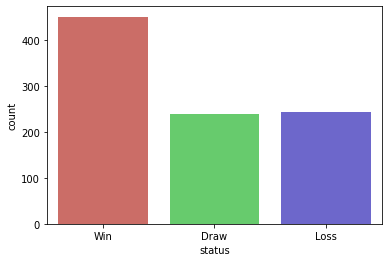

In [ ]:
# obtaining a graph for the status column

sb.countplot(x = 'status', data = football_data, palette = 'hls')

#### Encoding categorical variables

In [ ]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# label encode categorical features of the dataset
le = LabelEncoder()
football_encoded = football_data.apply(le.fit_transform)

# previewing the encoded data
football_encoded.head(3)

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,year,status
0,20,155,3,1,16,58,21,0,2
1,23,94,1,1,17,7,13,0,0
2,44,158,5,0,16,34,93,0,2


In [ ]:
# converting categorical variables to dummy indicators

# encoded_home_team = pd.get_dummies(football_data['home_team'], drop_first = True)
# encoded_away_team = pd.get_dummies(football_data['home_team'], drop_first = True)
# tournament_type = pd.get_dummies(football_data['tournament'], drop_first = True)
# encoded_year = pd.get_dummies(football_data['year'], drop_first = True)
# encoded_status = pd.get_dummies(football_data['status'], drop_first = True)

In [ ]:
# dropping previous categorical columns from the dataframe

# football_data.drop(['home_team', 'away_team', 'tournament', 'year', 'status'], axis = 1, inplace = True)

In [ ]:
# concatenating the datasets

# football_encoded = pd.concat([football_data, encoded_home_team, encoded_away_team, tournament_type, encoded_year, encoded_status], axis = 1)
# football_encoded.head(4)

The method opted for encoding the categorical variables is the label encoder as using the dummy indicators resulted to very many columns that were tedious and difficult to work with.

### Checking for multicollinearity

In [ ]:
football.head(3)

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,year,status
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,1993,Win
1,Brazil,Mexico,1,1,Friendly,8,14,1993,Draw
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94,1993,Win


In [ ]:
# dropping all columns that are dependent variables in the football_encoded dataset

# independent = football_encoded.drop(columns = ['home_score' ,'away_score', 'status'])


In [ ]:
# correlations between the independent variables
correlations = independent.corr()
correlations

,home_team,away_team,tournament,home_team_rank,away_team_rank,year
home_team,1.000000,0.032133,-0.053057,-0.011848,0.059396,0.010759
away_team,0.032133,1.000000,-0.077447,0.004157,-0.010931,-0.001479
tournament,-0.053057,-0.077447,1.000000,-0.061817,-0.116988,-0.073375
home_team_rank,-0.011848,0.004157,-0.061817,1.000000,0.108315,0.211456
away_team_rank,0.059396,-0.010931,-0.116988,0.108315,1.000000,0.261842
year,0.010759,-0.001479,-0.073375,0.211456,0.261842,1.000000


We observe a coefficient of 1 accross the diagonal as all the variables are perfectly positively correlated to themselves.

In [ ]:
# compute VIF scores for each variable

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)

,home_team,away_team,tournament,home_team_rank,away_team_rank,year
home_team,1.007026,-0.029517,0.045883,0.020456,-0.057850,0.003310
away_team,-0.029517,1.007318,0.079004,-0.002520,0.021632,0.002473
tournament,0.045883,0.079004,1.026204,0.044321,0.103311,0.038498
home_team_rank,0.020456,-0.002520,0.044321,1.052397,-0.056441,-0.204729
away_team_rank,-0.057850,0.021632,0.103311,-0.056441,1.091420,-0.265610
year,0.003310,0.002473,0.038498,-0.204729,-0.265610,1.115632


 Accross the diagonal, all the VIF scores are less than 5 indicating our variables are not largely correlated.

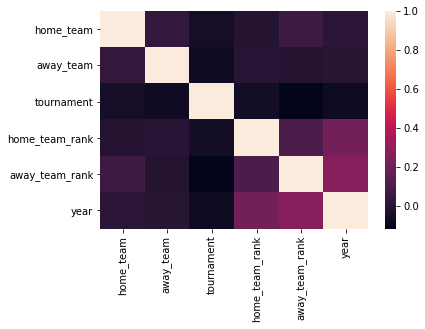

In [ ]:
# visualizing the correlations

sb.heatmap(independent.corr())

The map shows that all the variables are independent to each other hence our variables don't show multicollinearity.

## Polynomial Regression


What to train given:

1. Rank of home team

2. Rank of away team

3. Tournament type


In [ ]:
# importing necessary libraries

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Model 1: Predict how many goals the home team scores

In [ ]:
football_encoded.head(4)

# creating a dataframe of the required variables for this model

home_team_df = football_encoded[['home_score', 'tournament', 'home_team_rank', 'away_team_rank']]
home_team_df.head(3)

,home_score,tournament,home_team_rank,away_team_rank
0,3,16,58,21
1,1,17,7,13
2,5,16,34,93


In [ ]:
# calling train and test sets
X = home_team_df.drop("home_score", axis = 1)
y = home_team_df["home_score"]
              
# split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# fit a polynomial regression model of degree 2
poly_reg = PolynomialFeatures(degree = 1)    

#fit and transform our x independent variables into a formart that has the polynomial feature
X_poly = poly_reg.fit_transform(X)   
# X_test_poly = poly_reg.fit_transform(X_test)

# apply our polynomial feature to linear regression
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


# assess the accuracy of the model
y_pred = pol_reg.predict(poly_reg.fit_transform(X))

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 1.1493417157324521
Mean Squared Error: 2.566482539387738
Root Mean Squared Error: 1.6020245127299826


The root mean squared error is 1.60 which seems to be quite high hence our train and test sets are likely to be distributed unevely.It is therefore important to cross-validate our model.

### K-fold Cross Validation

In [ ]:
# calling train and test sets
X = home_team_df[["tournament", "home_team_rank", "away_team_rank"]].values
y = home_team_df["home_score"].values

# 
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5)
# 
print('we are using ' +str (folds.get_n_splits(X)) + ' folds')

# we create and assess 5 models based on the folds we created
RMSES = []
count = 1
for train_index, test_index in folds.split(X):
  print('\n Training model' + str(count))

  # set up train and test based on the split determined by kfold
  X_train1, X_test1 = X[train_index], X[test_index]
  y_train1, y_test1 = y[train_index], y[test_index]

  # fit a polynomial regression model of degree 1
  poly_reg_2 = PolynomialFeatures(degree = 1)     #fit a polynomial of degree 1
  X_poly_2 = poly_reg_2.fit_transform(X_train1)   #fit and transform our x independent variables into a formart that has the polynomial feature

  # apply our polynomial feature to linear regression
  pol_reg_2 = LinearRegression()
  pol_reg_2.fit(X_poly_2, y_train1)

  # assess the accuracy of the model
  y_pred1 = pol_reg_2.predict(poly_reg_2.fit_transform(X_test1))

  rmse_value = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1))
  RMSES.append(rmse_value)

  print('Model' + str(count) + 'Root Mean Squared Error:', rmse_value)
  count = count + 1


we are using 5 folds

 Training model1
Model1Root Mean Squared Error: 1.5117856981604358

 Training model2
Model2Root Mean Squared Error: 1.5815793734420207

 Training model3
Model3Root Mean Squared Error: 1.6425693430170047

 Training model4
Model4Root Mean Squared Error: 1.4131799495508548

 Training model5
Model5Root Mean Squared Error: 1.8820277026727608


In [ ]:
# compute the average value of all the RMSE scores above
np.mean(RMSES)

1.6062284133686155

From the above RMSE scores, we observe that model 5 had the highest RMSE while model 4 had the lowest RMSE out of the five models. This could mean that most outliers from the dataset landed in model 5 hence we should perform further analysis of the specific indices in model 5 to obtain better insights. 

The mean value of the model above is equal to the mean value of the five models. However, models 1, 2 and 4 have RSMES that are below the mean value hence they are the more reliable models to use. However, Model 4 is the best as it has the lowest RMSE score.

### Leave one out cross validation

In [ ]:
# calling train and test sets
X = home_team_df[["tournament", "home_team_rank", "away_team_rank"]].values
y = home_team_df["home_score"].values

# importing leave one out library
from sklearn.model_selection import LeaveOneOut

#
folds = LeaveOneOut()

#find out how many folds set up for using  get_n_splits
print('we are using ' + str (folds.get_n_splits(X)) + ' folds')

# create and assess five models based on the folds we have created

RMSES = []
count = 0
for train_index, test_index in folds.split(X):
  # set up train and test based on split determined by kfold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting a polynomial regression model of degree 1

  poly_reg = PolynomialFeatures(degree = 1)     #fit a polynomial of degree 
  X_poly = poly_reg.fit_transform(X_train)      #fit and transform our independent train sets into a formart that has the polynomial feature

  #apply our polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(X_poly, y_train)

  # making predictions
  y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

  # import metrics
  from sklearn import metrics

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append (rmse_value)

  count = count + 1

print('trained '+str(count) + ' models')
print('--------------------------')
print('The mean of the RMSES is: ' + str (np.mean(RMSES)))


we are using 933 folds
trained 933 models
--------------------------
The mean of the RMSES is: 1.1549488826962182


In [ ]:
# plotting RMSE scores accross all our models
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

The mean value of the RMSES from this approach is 1.1549, which is way lower than the models from the above 5 folds. So far, this is the best score which is going to be difficult to beat. Hence for predicting the home scores for the home teams this model is the better fit as compared to the other models.

Exploring how the RMSES will change using a polynomial of a higher degree

In [ ]:
# importing leave one out library
from sklearn.model_selection import LeaveOneOut

#
folds = LeaveOneOut()

#find out how many folds set up for using  get_n_splits
print('we are using ' + str (folds.get_n_splits(X)) + ' folds')

# create and assess five models based on the folds we have created

RMSES = []
count = 0
for train_index, test_index in folds.split(X):
  # set up train and test based on split determined by kfold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting a polynomial regression model of degree 2

  poly_reg = PolynomialFeatures(degree = 2)     #fit a polynomial of degree 2
  X_poly = poly_reg.fit_transform(X_train)      #fit and transform our independent train sets into a formart that has the polynomial feature

  #apply our polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(X_poly, y_train)

  # making predictions
  y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

  # import metrics
  from sklearn import metrics

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append (rmse_value)

  count = count + 1

print('trained '+str(count) + ' models')
print('--------------------------')
print('The mean of the RMSES is: ' + str (np.mean(RMSES)))

we are using 933 folds
trained 933 models
--------------------------
The mean of the RMSES is: 1.1568454187779829


By increasing the degree of the polynomial to 2, the RMSE score has increased slightly. This is an indication that the best model to use is a polynomial of degree 1 to avoid overfitting.

#### Residuals and Heteroscedasticity

In [ ]:
# creating the residuals
residuals = np.subtract(y_pred, y_test)

# describing our residuals
pd.DataFrame(residuals).describe()
residuals.mean()

1.1887979267660311

The mean of the residuals is 1,189 which is moderate




In [ ]:
# performimg a heteroscedasticity test
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)
test_result, p_value

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


(nan, nan)

#### Model 2: Predict how many goals the away team scores

In [ ]:
# creating a dataframe with the required variables

away_team_df = football_encoded[["away_score", "tournament", "home_team_rank", "away_team_rank"]]
away_team_df.head(3)

,away_score,tournament,home_team_rank,away_team_rank
0,1,16,58,21
1,1,17,7,13
2,0,16,34,93


In [ ]:
# calling train and test sets

A = away_team_df.drop("away_score", axis = 1)
b = away_team_df["away_score"]
              
# print(A)
# print(b)

In [ ]:
# fitting a polynomial regression model of degree 1

poly_reg = PolynomialFeatures(degree = 1)     #fit a polynomial of degree 1
A_poly = poly_reg.fit_transform(A)             #fit and transform our independent train sets into a formart that has the polynomial feature

#apply our polynomial feature to linear regression
pol_reg = LinearRegression()                          
pol_reg.fit(A_poly, b)

# making predictions
b_pred = pol_reg.predict(poly_reg.fit_transform(A))

# assessing the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b, b_pred)))

Root Mean Squared Error: 1.154235483617598


The predicted model has a root mean squared error of 1.154 is quite high hence it is important to cross validate the model.

In [ ]:
# importing leave one out library
from sklearn.model_selection import LeaveOneOut

# calling train and test sets
A = away_team_df[["tournament", "home_team_rank", "away_team_rank"]].values
b = away_team_df["away_score"].values

#
folds = LeaveOneOut()

#find out how many folds set up for using  get_n_splits
print('we are using ' + str (folds.get_n_splits(X)) + ' folds')

# create and assess five models based on the folds we have created

RMSES = []
count = 0
for train_index, test_index in folds.split(X):
  # set up train and test based on split determined by kfold
  A_train, A_test = A[train_index], A[test_index]
  b_train, b_test = b[train_index], b[test_index]

  # fitting a polynomial regression model of degree 2

  poly_reg = PolynomialFeatures(degree = 2)     #fit a polynomial of degree 2
  A_poly = poly_reg.fit_transform(A_train)      #fit and transform our independent train sets into a formart that has the polynomial feature

  #apply our polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(A_poly, b_train)

  # making predictions
  b_pred = pol_reg.predict(poly_reg.fit_transform(A_test))

  # import metrics
  from sklearn import metrics

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(b_test, b_pred))
  RMSES.append (rmse_value)

  count = count + 1
  
print('trained '+str(count) + ' models')
print('--------------------------')
print('The mean of the RMSES is: ' + str (np.mean(RMSES)))


we are using 933 folds
trained 933 models
--------------------------
The mean of the RMSES is: 0.848216707120763


After cross validation the RMSE score had greatly reduced. It would be difficult to fit a polynomial model with a lower RMSES hence the cross validated model is a better model.

#### Residuals and heteroscedasticity

In [ ]:
# creating the residuals
residuals = np.subtract(b_pred, b_test)

# describing our residuals
pd.DataFrame(residuals).describe()
residuals.mean()

-1.2615333463777727

The mean value of the residuals is negative. This shows that there is a negative difference between the predicted scores and the test score values

In [ ]:
# performimg a heteroscedasticity test
import scipy as sp
test_result, p_value = sp.stats.bartlett(b_pred, residuals)
test_result, p_value

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


(nan, nan)

###Logistic Regression

What is the home team's perspective if the game is a win, loss or draw?

In [ ]:
# previewing the dataset
football_encoded.head(3)

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,year,status
0,20,155,3,1,16,58,21,0,2
1,23,94,1,1,17,7,13,0,0
2,44,158,5,0,16,34,93,0,2


In [ ]:
# creating a new dataframe of the target variable and the independent features of this variable
home_team_perspective = football_encoded[['home_team', 'home_score', 'tournament', 'home_team_rank', 'status']]
home_team_perspective.head(3)

,home_team,home_score,tournament,home_team_rank,status
0,20,3,16,58,2
1,23,1,17,7,0
2,44,5,16,34,2


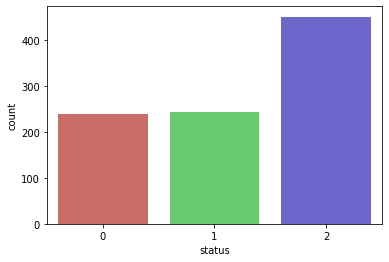

In [ ]:
# checking our target variable 
sb.countplot(x = 'status', data = home_team_perspective, palette = 'hls')

From the output, the target variable has more than two outcomes hence it is not binary

In [ ]:
# confirming there are no missing values in the dataset
home_team_perspective.isnull().values.any()

False

The encoded dataset does not contain any missing values

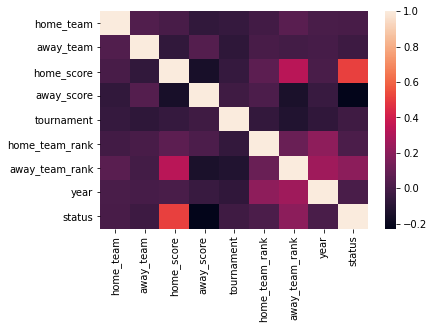

In [ ]:
#checking for independence between features
sb.heatmap(home_team_perspective.corr())

All the features are independent hence we retain all of them

In [ ]:
#checking the dataset size is sufficent
home_team_perspective.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 0 to 932
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   home_team       933 non-null    int64
 1   home_score      933 non-null    int64
 2   tournament      933 non-null    int64
 3   home_team_rank  933 non-null    int64
 4   status          933 non-null    int64
dtypes: int64(5)
memory usage: 83.7 KB


The dataset contains 933 records, these are all the records that were generated from merging the two datasets hence the data is sufficient

In [ ]:
# splitting the data
W = home_team_perspective.drop("status", axis = 1)
z = home_team_perspective["status"]

#splitting the data to train and test sets
from sklearn.model_selection import train_test_split

W_train, W_test, z_train, z_test = train_test_split(W, z, test_size = 0.3, random_state = 25)

# fitting the model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(W_train, z_train)

# using our model to make predictions
z_pred = LogReg.predict(W_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# evaluating the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Confusion_matrix = confusion_matrix(z_test, z_pred)
print(Confusion_matrix)
print('\n')
print('Accuracy ', accuracy_score(z_test, z_pred))

[[ 19  31  14]
 [ 27  46   3]
 [ 29   2 109]]


Accuracy  0.6214285714285714


From the model, we have a total of 19, 46 and 109 correct predictions while the number of incorrect predictions are 14, 46 and 29. This means that the logistic model has an accuracy of 62% of the home team's perspective on the games.

#### Hyperparameter Tuning

In [ ]:
# creating regularization penalty space
penalty = ['l1', 'l2']

In [ ]:
# creating regularization hyperparameter space
C = np.logspace(0,4,10)

In [ ]:
# solver 
solver = ['liblinear', 'saga']

In [ ]:
# creating hyperparameter options
hyperparameters = dict(C=C, penalty = penalty, solver = solver)

In [ ]:
from sklearn.model_selection import GridSearchCV
# creating gridsearch using 5 fold cross validation
logistic = linear_model.LogisticRegression
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose = 0)

In [ ]:
# fitting gridsearch
# import scipy
# scipy.linalg.lstsq

# klass = estimator._class_
# new_object_params = estimator.get_params(deep = False)
best_model = gridsearch.fit(W,z)

# viewing  best hyperparameters
print('Best Penalty: ' ,best_model.best_estimator_.get_params()['penalty'])
print('Best C: ' ,best_model.best_estimator_.get_params()['C'])

# predicting target vector
best_model.predict(W)

TypeError: ignored

Residual plots and Heteroscedasticity testing

In [ ]:
# creating the residuals
residuals = np.subtract(z_pred, z_test)

# describing our residuals
pd.DataFrame(residuals).describe()
residuals.mean()

-0.08928571428571429

<function matplotlib.pyplot.show>

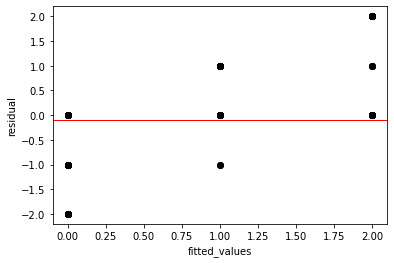

In [ ]:
# plotting residuals
import matplotlib.pyplot as plt
plt.scatter(z_pred, residuals, color = 'black')
plt.ylabel('residual')
plt.xlabel('fitted_values')
plt.axhline(y=residuals.mean(), color = 'red', linewidth = 1)
plt.show

In [ ]:
# performimg a heteroscedasticity test
import scipy as sp
test_result, p_value = sp.stats.bartlett(z_pred, residuals)
test_result, p_value

(2.6177729728604406, 0.1056726561889552)

By using the Bartlett's test, we have a hypothesis established as follows:
 
 Null hypothesis: the variance is equal for all our datapoints

 Alternative hypothesis: the variance is different for at least one pair of the datasets.


In [ ]:
# computing a critical value
df = len(z_pred) - 1
probability = 1 - p_value

# 
critical_value = sp.stats.chi2.ppf(probability, df)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal and the model should be reassessed')
else:
  print('the variances are homogeneous!')


308.8673518456948
the variances are homogeneous!


After calculating the critical values and the test results, the critical values of the model are greater than the test results, hence we reject the null hypothesis as we have enough evidence to conclude that the variance is different for at least one pair of datapoints. 
This means that our model is efficient and it does not need to be assessed.

##8. Challenging the solution

The polynomial model predicting the home team's scores has a RMSE score of 1.15  while the polynomial model predicting the away team's score has a RMSE score of 0.84. It is evident that the latter model is a better fit as it has a lower RMSE score. However, RMSE score of 0.84 is not the lowest that can be obtained. The logistic regression model has an accuracy of 62% which is also not the best accuracy for the model.

From our data processing process, we had a huge number of records that we lost while we were mergine our datasets. We could have obtained better results for our models if we had more variables to train our models hence it would be best to find a better way of merging the datasets without loosing that much records.

Also while encoding our categorical variables, the method used i.e label encoding was not the most efficient as the algorithms probably considered the data as ordered data yet they were not. Hence, we should probably use better methods to encode the categorical data to obtain better results.

##9. Follow up questions

While merging the data on the dates column, the datapoints retained were of scores and rankings that were recorded the same day. This suggests that the scores and the rankings are made on the same dates, however, how likely is it that this is usually the case? 